# Creating Neural Networks from Scratch

CSC/DSC 340 Week 9 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 16, 2023

Last Modified: October 16, 2023

* This week we will learn how to create neural networks from scratch, using the Python library JAX to perform the optimization.
* Another common library for this task is _autograd_ but it is no longer being maintained

## Review of Neural Network Equations 

* A return to Week 7 Slides

## Creating a Neural Network from Scratch Using JAX

* JAX is an automatic differentiation library in Python that can find the derivative of any chunk of code it is given.  
* If you are interested you can read more about the library [here](https://github.com/google/jax).

In [1]:
# IMPORTS
# Math for the ceiling function
from math import ceil
# Matplotlib for graphing capabilities
from matplotlib import pyplot as plt
# Numpy for arrays
import numpy as np
# Modules from the JAX library for creating neural networks
import jax.numpy as jnp
from jax import grad
from jax import random as npr

### Generate the Data Set

Let's keep things simple and generate a data points from a Gaussian curve.  We will have our x data be evenly space between -10 and 10 and our y data be the corresponding points on a Gaussian curve.


In [2]:
# Let's create a data set that is just a basic Gaussian curve
X = np.linspace(-10,10,250)
y = np.exp(-X**2)


### Perform a Train-Test Split


In [3]:
# We will split the data set into two pieces, a training data set that contains
# 80% of the total data and a test set that contains the other 20%
from sklearn.model_selection import train_test_split
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)


### Define the Neural Network

First we will define the sigmoid function as our activation function.



In [4]:
def sigmoid(x):
    """
        Calculates the value of the sigmoid function for 
        a given input of x
    """
    return 1. / (1. + jnp.exp(-x))

* Now we will define our neural network.  
* Here we will be using an architecture with two hidden layers, each using the sigmoid activation function, and an output layer which does not have an activation function.  
* Note that we do not use the bias offset in this code


In [5]:
def neural_network(W, x):
    """
        Inputs:
            W (a list): the weights of the neural network
            x (a float): the input value of the neural network
        Returns:
            Unnamed (a float): The output of the neural network
        Defines a neural network with one hidden layer.  The number of neurons in
        the hidden layer is the length of W[0]. The activation function is the 
        sigmoid function on the hidden layer an none on the output layer.
    """
    # Calculate the output for the neurons in the hidden layers
    hidden_layer1 = sigmoid(jnp.dot(x,W[0]))
    hidden_layer2 = sigmoid(jnp.dot(hidden_layer1, W[1]))
    # Calculate the result for the output neuron
    return jnp.dot(hidden_layer2, W[2])

### Define the Loss Function

Now we need to define our loss function.  For simplicity we will be using the mean-squared error loss function, which is a very common loss function for training neural networks.


In [6]:
def loss_function(W, x, y):
    """
        Inputs:
            W (a list): the weights of the neural network
            t (a 1D NumPy array): the times to calculate the predicted position at
        Returns:
            loss_sum (a float): The total loss over all times
        The loss function for the neural network to solve for position given 
        a function for acceleration.
    """
    # Define a variable to hold the total loss
    loss_sum = 0.
    # Loop through each individual time
    for i in range(len(x)):
        # Get the output of the neural network with the given set of weights
        nn = neural_network(W, x[i])[0][0]
        err_sqr = (nn-y[i])**2
        # Update the loss sum
        loss_sum += err_sqr
    loss_sum /= len(x)
    # Return the loss sum    
    return loss_sum

### Train the Neural Network

* Finally we need to train our neural network.  
* We will start by randomly initializing the weights of our neural network (with 25 neurons per hidden layer).

In [7]:
# Generate the key for the random number generator
key = npr.PRNGKey(0)
# Set the number of neurons in the hidden layer
number_hidden_neurons = 25
# Initialize the weights of the neural network with random numbers
W = [npr.normal(key,(1, number_hidden_neurons)), 
     npr.normal(key,(number_hidden_neurons,number_hidden_neurons)), 
     npr.normal(key,(number_hidden_neurons, 1))]

* We then define the parameters for the learning rate, the number of training iterations, and the threshold for stopping the training.


In [8]:
# Set the learning rate and the number of training iterations for the network
learning_rate = 0.01
num_training_iterations = 100
threshold = 0.0001
previous_loss = 0

* Next, we perform gradient descent to update the weights of the neural network over for the set number of training iterations, or until the loss function value converges to some set threshold.

**WARNING**: This cell will take a long time to run.



In [9]:
# Train the neural network for the specified number of iterations
# Update the weights using the learning rates
for i in range(num_training_iterations):
    print("Training Iteration:", i+1)
    current_loss = loss_function(W,X_train,y_train)
    print("Loss:", current_loss)
    print()
    # If the current loss is within a set threshold of the previous loss, stop
    # the training
    if np.abs(current_loss-previous_loss) < threshold:
        break;
    # Calculate the gradient of the loss function and then use that gradient to
    # update the weights of the neural network using the learning rate and the 
    # gradient descent optimization method
    loss_grad =  grad(loss_function)(W, X_train, y_train)
    # Update first hidden layer
    W[0] = W[0] - learning_rate * loss_grad[0]
    # Update second hidden layer
    W[1] = W[1] - learning_rate * loss_grad[1]
    # Update output layer
    W[2] = W[2] - learning_rate * loss_grad[2]
    previous_loss = current_loss

Training Iteration: 1
Loss: 5.3948293



Training Iteration: 2
Loss: 3.73042



Training Iteration: 3
Loss: 2.6401887



Training Iteration: 4
Loss: 1.9165754



Training Iteration: 5
Loss: 1.428656



Training Iteration: 6
Loss: 1.0936975



Training Iteration: 7
Loss: 0.85916555



Training Iteration: 8
Loss: 0.69148195



Training Iteration: 9
Loss: 0.5690006



Training Iteration: 10
Loss: 0.4776287



Training Iteration: 11
Loss: 0.40808192



Training Iteration: 12
Loss: 0.35415912



Training Iteration: 13
Loss: 0.31165215



Training Iteration: 14
Loss: 0.27765605



Training Iteration: 15
Loss: 0.25012755



Training Iteration: 16
Loss: 0.22760028



Training Iteration: 17
Loss: 0.20900093



Training Iteration: 18
Loss: 0.19352901



Training Iteration: 19
Loss: 0.18057571



Training Iteration: 20
Loss: 0.1696702



Training Iteration: 21
Loss: 0.16044348



Training Iteration: 22
Loss: 0.15260157



### Analyze the Results

Now we need to analyze the performance of our neural network using the test data set that was reserved earlier.  First we need to generate the neural network predictions for the y component of the test data set.

In [10]:
y_nn = [neural_network(W, xi)[0][0] for xi in X_test] 

First lets analyze the results graphically by plotting the predicted test data set and the true test data set on the same graph.



Text(0, 0.5, 'y')

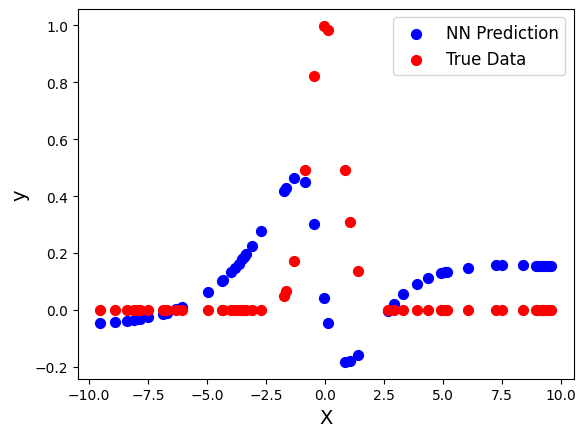

In [11]:
plt.scatter(X_test, y_nn, s=50, color="blue",label="NN Prediction")
plt.scatter(X_test, y_test, s=50, color="red", label="True Data")
plt.legend(fontsize=12)
plt.xlabel("X",fontsize=14)
plt.ylabel("y",fontsize=14)

Next let's analyze the error numerically using the root mean-squared error (RMSE) function, which is simiply the square root of the mean-squared error.  The RMSE gives the average error on each data point (instead of the squared average error) so it is a met more of a clear metric for error analysis.  First, let's define a function to calculate the RMSE between two data sets.



In [12]:
def rmse(A,B):
    """
        Inputs:
            A,B (NumPy arrays)
        Returns:
            Unnamed (a float): the RMSE error between A and B
        Calculates the RMSE error between A and B.
    """
    assert len(A)==len(B),"The data sets must be the same length to calcualte\
        the RMSE."
    return np.sqrt(np.average((A-B)**2)) 



Now let's print the RMSE between the true test data set and the neural network prediction.














In [13]:
print("RMSE between true test set and neural network result:", rmse(y_nn,y_test))

RMSE between true test set and neural network result: 0.28406674843753915


## Hyperparameter Tuning: Changing the Number of Layers, the Number of Hidden Neurons, and the Activation Function

* First let's change the activation function to the hyperbolic tangent function and add in an additional hidden layer

In [15]:
def neural_network(W, x):
    """
        Inputs:
            W (a list): the weights of the neural network
            x (a float): the input value of the neural network
        Returns:
            Unnamed (a float): The output of the neural network
        Defines a neural network with one hidden layer.  The number of neurons in
        the hidden layer is the length of W[0]. The activation function is the 
        sigmoid function on the hidden layer an none on the output layer.
    """
    # Calculate the output for the neurons in the hidden layers
    hidden_layer1 = jnp.tanh(jnp.dot(x,W[0]))
    hidden_layer2 = jnp.tanh(jnp.dot(hidden_layer1, W[1]))
    hidden_layer3 = jnp.tanh(jnp.dot(hidden_layer2, W[2]))
    # Calculate the result for the output neuron
    return jnp.dot(hidden_layer3, W[3])

* We also need to change the weights matrix to reflect the additional hidden layer. Let's also change the number of neurons per layer to 10.
* Not you can also change this code to have a different number of neurons per layer. The tuple passed to npr.normal just needs the form (neurons in previous layer, neurons in thsi layer).

In [16]:
# Generate the key for the random number generator
key = npr.PRNGKey(0)
# Set the number of neurons in the hidden layer
number_hidden_neurons = 10
# Initialize the weights of the neural network with random numbers
W = [npr.normal(key,(1, number_hidden_neurons)), 
     npr.normal(key,(number_hidden_neurons,number_hidden_neurons)),
     npr.normal(key,(number_hidden_neurons,number_hidden_neurons)),
     npr.normal(key,(number_hidden_neurons, 1))]

* The loss function can stay the same but we need to update the training loop so that the gradient descent is applied correctly to all layers

In [17]:
# Train the neural network for the specified number of iterations
# Update the weights using the learning rates
for i in range(num_training_iterations):
    print("Training Iteration:", i+1)
    current_loss = loss_function(W,X_train,y_train)
    print("Loss:", current_loss)
    print()
    # If the current loss is within a set threshold of the previous loss, stop
    # the training
    if np.abs(current_loss-previous_loss) < threshold:
        break;
    # Calculate the gradient of the loss function and then use that gradient to
    # update the weights of the neural network using the learning rate and the 
    # gradient descent optimization method
    loss_grad =  grad(loss_function)(W, X_train, y_train)
    # Update first hidden layer
    W[0] = W[0] - learning_rate * loss_grad[0]
    # Update second hidden layer
    W[1] = W[1] - learning_rate * loss_grad[1]
    # Update the third hidden layer
    W[2] = W[2] - learning_rate * loss_grad[2]
    # Update the output layer
    W[3] = W[3] - learning_rate * loss_grad[3]
    previous_loss = current_loss

Training Iteration: 1
Loss: 1.1299691

Training Iteration: 2
Loss: 0.6174519

Training Iteration: 3
Loss: 0.31264007

Training Iteration: 4
Loss: 0.16775803

Training Iteration: 5
Loss: 0.14251728

Training Iteration: 6
Loss: 0.1224951

Training Iteration: 7
Loss: 0.10705274

Training Iteration: 8
Loss: 0.095398515

Training Iteration: 9
Loss: 0.086740516

Training Iteration: 10
Loss: 0.0803774

Training Iteration: 11
Loss: 0.07573033

Training Iteration: 12
Loss: 0.072346665

Training Iteration: 13
Loss: 0.06988322

Training Iteration: 14
Loss: 0.068086274

Training Iteration: 15
Loss: 0.06677092

Training Iteration: 16
Loss: 0.065803535

Training Iteration: 17
Loss: 0.065088086

Training Iteration: 18
Loss: 0.06455563

Training Iteration: 19
Loss: 0.06415678

Training Iteration: 20
Loss: 0.063855894

Training Iteration: 21
Loss: 0.06362721

Training Iteration: 22
Loss: 0.06345217

Training Iteration: 23
Loss: 0.06331712

Training Iteration: 24
Loss: 0.06321208

Training Iteration: 25

* The analysis code can be the same

RMSE between true test set and neural network result: 0.2615405748140697


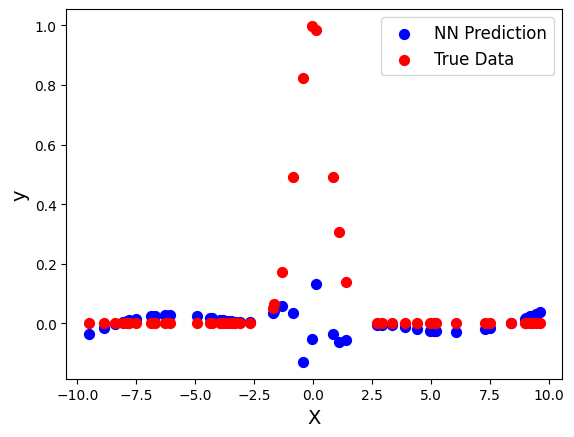

In [19]:
y_nn = [neural_network(W, xi)[0][0] for xi in X_test] 

plt.scatter(X_test, y_nn, s=50, color="blue",label="NN Prediction")
plt.scatter(X_test, y_test, s=50, color="red", label="True Data")
plt.legend(fontsize=12)
plt.xlabel("X",fontsize=14)
plt.ylabel("y",fontsize=14)

print("RMSE between true test set and neural network result:", rmse(y_nn,y_test))